In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing  import OneHotEncoder  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from plotnine import *

In [60]:
!pip install plotnine

In [61]:
ds = pd.read_csv('data_set_diabetes.csv')
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Verificando Presença de Outliers 

Outliers são dados que se diferenciam drasticamente de todos os outros

#### Separando conjunto de dados: Treino, Validação e Teste

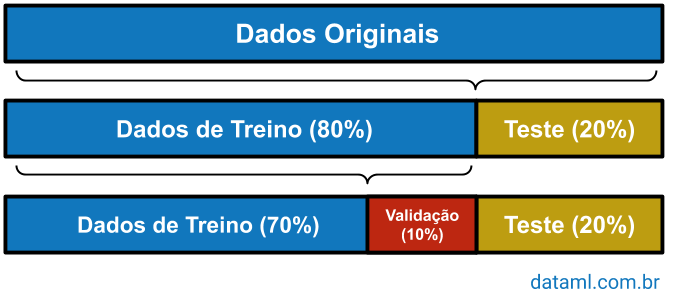

In [62]:
train, test = train_test_split(ds,test_size=0.2,random_state=0)
#Separei 80% dos dados para treinar o modelo
#Separei 20% dos dados para testar o modelo

train, val = train_test_split(train,test_size=0.125,random_state=0)
#Dos 80% dos dados para treinar o modelo, separei 70% para treino e 10% para validação

In [63]:
print(f"Base Total: {ds.shape}")
print(f"Treino: {train.shape}")
print(f"Validação: {val.shape}")
print(f"Teste: {test.shape}")

Base Total: (768, 9)
Treino: (537, 9)
Validação: (77, 9)
Teste: (154, 9)


In [64]:
train.iloc[:,0:8] = MinMaxScaler().fit_transform(train.iloc[:,0:8])
test.iloc[:,0:8] = MinMaxScaler().fit_transform(test.iloc[:,0:8])
val.iloc[:,0:8] = MinMaxScaler().fit_transform(val.iloc[:,0:8])

C:\Users\carlos.d.pereira\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
301,0.117647,0.727273,0.475410,0.333333,0.159574,0.470939,0.146883,0.078431,1
712,0.588235,0.651515,0.508197,0.363636,0.000000,0.614009,0.154996,0.333333,1
294,0.000000,0.813131,0.409836,0.000000,0.000000,0.326379,0.075149,0.862745,0
209,0.411765,0.929293,0.688525,0.333333,0.000000,0.529061,0.118275,0.392157,1
717,0.588235,0.474747,0.590164,0.181818,0.000000,0.344262,0.220751,0.686275,0
...,...,...,...,...,...,...,...,...,...
715,0.411765,0.944444,0.409836,0.333333,0.463357,0.505216,0.319385,0.254902,1
530,0.117647,0.616162,0.491803,0.181818,0.125296,0.444113,0.272844,0.019608,0
93,0.235294,0.676768,0.590164,0.000000,0.000000,0.354694,0.084970,0.764706,1
628,0.294118,0.646465,0.655738,0.000000,0.000000,0.515648,0.028181,0.470588,0


#### Separar a saída do conjunto

In [66]:
train_x = train.drop(columns = ['Outcome'],axis=1)
train_y = train['Outcome']
test_x = test.drop(columns = ['Outcome'],axis=1)
test_y = test['Outcome']

In [67]:
train_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
301,0.117647,0.727273,0.475410,0.333333,0.159574,0.470939,0.146883,0.078431
712,0.588235,0.651515,0.508197,0.363636,0.000000,0.614009,0.154996,0.333333
294,0.000000,0.813131,0.409836,0.000000,0.000000,0.326379,0.075149,0.862745
209,0.411765,0.929293,0.688525,0.333333,0.000000,0.529061,0.118275,0.392157
717,0.588235,0.474747,0.590164,0.181818,0.000000,0.344262,0.220751,0.686275
...,...,...,...,...,...,...,...,...
715,0.411765,0.944444,0.409836,0.333333,0.463357,0.505216,0.319385,0.254902
530,0.117647,0.616162,0.491803,0.181818,0.125296,0.444113,0.272844,0.019608
93,0.235294,0.676768,0.590164,0.000000,0.000000,0.354694,0.084970,0.764706
628,0.294118,0.646465,0.655738,0.000000,0.000000,0.515648,0.028181,0.470588


In [68]:
train_y

301    1
712    1
294    0
209    1
717    0
      ..
715    1
530    0
93     1
628    0
273    0
Name: Outcome, Length: 537, dtype: int64

In [69]:
val_x = val.drop(columns = ['Outcome'],axis=1)
val_y = val['Outcome']

In [70]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x, train_y)
RF = RandomForestClassifier().fit(train_x, train_y)

In [71]:
metricas_treino = {
        'Accuracy': [LR.score(train_x, train_y),
                     LDA.score(train_x,train_y),
                     DT.score(train_x,train_y),
                     KN. score(train_x,train_y),
                     SVM. score(train_x, train_y),
                     RF.score(train_x, train_y)],    
        'Precision': [precision_score(train_y, LR.predict(train_x)),
                      precision_score(train_y, LDA.predict(train_x)),
                      precision_score(train_y, DT.predict(train_x)),
                      precision_score(train_y, KN.predict(train_x)),
                      precision_score(train_y, SVM.predict(train_x)),
                      precision_score(train_y, RF.predict(train_x))],
        'Recall': [recall_score(train_y, LR.predict(train_x)),
                    recall_score(train_y, LDA.predict(train_x)),
                    recall_score(train_y, DT.predict(train_x)),
                    recall_score(train_y, KN.predict(train_x)),
                    recall_score(train_y, SVM.predict(train_x)),
                    recall_score(train_y, RF.predict(train_x))]
                    }

dados = pd.DataFrame(metricas_treino,
                    columns = ['Accuracy', 'Precision', 'Recall'],
                    index = ['LR','LDA','DT','KN','SVM','RF'])
dados

,Accuracy,Precision,Recall
LR,0.765363,0.748092,0.513089
LDA,0.772812,0.728477,0.575916
DT,1.000000,1.000000,1.000000
KN,0.800745,0.765823,0.633508
SVM,0.797020,0.805970,0.565445
RF,1.000000,1.000000,1.000000


PS: Overfitting (modelo treinado demais) no RF DT

In [72]:
metricas_treino_val = {
        'Accuracy': [LR.score(val_x, val_y),
                     LDA.score(val_x,val_y),
                     DT.score(val_x,val_y),
                     KN. score(val_x,val_y),
                     SVM. score(val_x, val_y),
                     RF.score(val_x, val_y)],    
        'Precision': [precision_score(val_y, LR.predict(val_x)),
                      precision_score(val_y, LDA.predict(val_x)),
                      precision_score(val_y, DT.predict(val_x)),
                      precision_score(val_y, KN.predict(val_x)),
                      precision_score(val_y, SVM.predict(val_x)),
                      precision_score(val_y, RF.predict(val_x))],
        'Recall': [recall_score(val_y, LR.predict(val_x)),
                    recall_score(val_y, LDA.predict(val_x)),
                    recall_score(val_y, DT.predict(val_x)),
                    recall_score(val_y, KN.predict(val_x)),
                    recall_score(val_y, SVM.predict(val_x)),
                    recall_score(val_y, RF.predict(val_x))]
                    }

dados_val = pd.DataFrame(metricas_treino_val,
                    columns = ['Accuracy', 'Precision', 'Recall'],
                    index = ['LR','LDA','DT','KN','SVM','RF'])
dados_val

,Accuracy,Precision,Recall
LR,0.753247,0.923077,0.400000
LDA,0.727273,0.800000,0.400000
DT,0.727273,0.736842,0.466667
KN,0.779221,0.882353,0.500000
SVM,0.740260,0.857143,0.400000
RF,0.753247,0.923077,0.400000


PS: Não temos mais Overfitting no Random Forest e Decision Tree

#### Matriz de Confusão

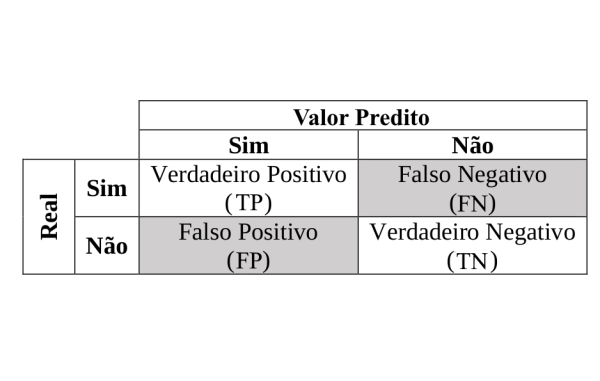

<function matplotlib.pyplot.show(close=None, block=None)>

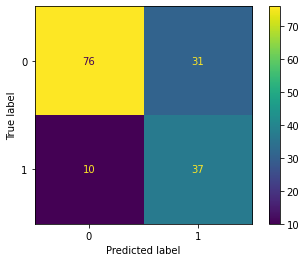

In [73]:
plot_confusion_matrix(RF, test_x, test_y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

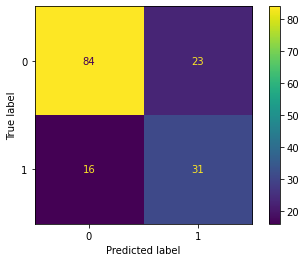

In [75]:
plot_confusion_matrix(KN, test_x, test_y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

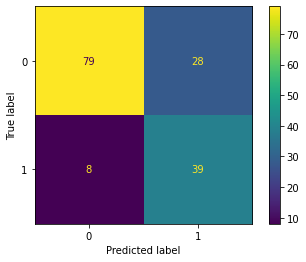

In [76]:
plot_confusion_matrix(LR, test_x, test_y)
plt.show